# Perceptron Lab





In [231]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import LabelEncoder
import numpy as np
import scipy.io.arff as arff
import pandas as pd
import random as rand
import matplotlib.pyplot as plt

## 1. (40%) Correctly implement and submit your own code for the perceptron learning algorithm. 

### Code requirements
- Shuffle the data each epoch.
- Use Stochastic/On-line training updates: Iterate and update weights after each training instance (i.e. do not attempt batch updates)
- Implement a stopping criterion: when your model has trained for a number of epochs with no significant improvement in accuracy, stop training. Note that the weights/accuracy do not usually change monotonically.
- Use your perceptron to solve the Debug data. We provide you with several parameters, and you should be able to replicate our results every time. When you are confident it is correct, run your perceptron on the Evaluation data with the same parameters, and print your final weights and accuracy.

In [232]:
class PerceptronClassifier(BaseEstimator,ClassifierMixin):

    def __init__(self, lr=.1, shuffle=True,deterministic=None):
        """ 
            Initialize class with chosen hyperparameters.
        Args:
            lr (float): A learning rate / step size.
            shuffle: Whether to shuffle the training data each epoch. DO NOT 
            SHUFFLE for evaluation / debug datasets.
        """
        self.lr = lr
        self.shuffle = shuffle
        self.deterministic = deterministic
        self.scores = []
            

    def fit(self, X, y, initial_weights=None):
        """ 
            Fit the data; run the algorithm and adjust the weights to find a 
            good solution
        Args:
            X (array-like): A 2D numpy array with the training data, excluding
            targets
            y (array-like): A 2D numpy array with the training targets
            initial_weights (array-like): allows the user to provide initial 
            weights
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)
        """        
        self.weights = self.initialize_weights(len(X[0]) + 1) if not initial_weights else initial_weights
        self.bias = 1
        count = 0
        #output prediction
        if self.deterministic:
            for i in range(self.deterministic):
                self.scores.append(1-self.score(X,y))
                for j,x in enumerate(X):
                    x = np.append(x,1)
                    linear_output = np.dot(x, self.weights) #w*x
                    if linear_output > 0:
                        output = 1
                    else:
                        output = 0
                    #add 1 on the row
                    update = self.lr * (y[j] - output)
                    target = y[j]
                    if target != output:
                        self.weights += update * x
                    else:
                        count += 1

        else:
            num_epic_last_improv = 0
            best_accur = 0
            while num_epic_last_improv < 10:
                num_correct = 0 
                X,y = _shuffle_data(X,y)
                self.scores.append(1-self.score(X,y))
                for j,x in enumerate(X):
                    x = np.append(x,1)
                    linear_output = np.dot(x, self.weights) #w*x
                    if linear_output > 0:
                        output = 1
                    else:
                        output = 0
                    #add 1 on the row
                    update = self.lr * (y[j] - output)
                    target = y[j]
                    if target != output:
                        self.weights += update * x
                        
                    else:
                        num_correct += 1
                        
                if num_correct > best_accur:
                    best_accur = num_correct
                    num_epic_last_improv = 0
                else:
                    num_epic_last_improv += 1
             
               
        
        
        return self

    def predict(self, X):
        """ 
            Predict all classes for a dataset X
        Args:
            X (array-like): A 2D numpy array with the training data, excluding 
            targets
        Returns:
            array, shape (n_samples,)
                Predicted target values per element in X.
        """
        
        n_samples = X.shape[0]
        y_pred = np.zeros(len(X))
        for j,x in enumerate(X):
            x = np.append(x,1)
            dot_product = np.dot(x, self.weights)
            if dot_product >= 0:
                y_pred[j] = 1
             
        return y_pred
    

    def initialize_weights(self, n_features):
        """ Initialize weights for perceptron. Don't forget the bias!
        Returns:
        """
        return np.zeros(n_features)

    def score(self, X, y):
        """ 
            Return accuracy of model on a given dataset. Must implement own 
            score function.
        Args:
            X (array-like): A 2D numpy array with data, excluding targets
            y (array-like): A 2D numpy array with targets
        Returns:
            score : float
                Mean accuracy of self.predict(X) wrt. y.
        """

        y_pred = self.predict(X)
        correct_predictions = np.sum(y_pred == y)
        accuracy = correct_predictions / y.shape[0]
        return accuracy

    def _shuffle_data(self, X, y):
        """ 
            Shuffle the data! This _ prefix suggests that this method should 
            only be called internally.
            It might be easier to concatenate X & y and shuffle a single 2D 
            array, rather than shuffling X and y exactly the same way, 
            independently.
        """
        
        assert len(X) == len(y)
        p = numpy.random.permutation(len(X))
        
        return X[p], y[p]
        

    ### Not required by sk-learn but required by us for grading. Returns the weights.
    def get_weights(self):
        return self.weights
    def get_scores(self):
        return self.scores

## 1.1 Debug and Evaluation

Debug and Evaluate your model using the parameters below

Learning Rate = 0.1\
Deterministic = 10 [i.e., run it 10 epochs and should be the same everytime you run it]\
Shuffle = False\
Initial Weights = All zeros

---

### 1.1.1 Debug

Debug your model by running it on the [debug dataset](https://byu.instructure.com/files/4421290/download?download_frd=1)

Expected Results:

Accuracy = [0.88]\
Final Weights = [-0.23  0.18 -0.1 ]

In [233]:
# Load debug data
classifier = PerceptronClassifier(deterministic=10)
!curl https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/linsep2nonorigin.arff --output debug-dataset.arff
debug_data = arff.loadarff('debug-dataset.arff')
debug_data = pd.DataFrame(debug_data[0]).values.astype(float)

mat = debug_data
data = mat[:,:-1]

labels = mat[:,-1] 
classifier.fit(data, labels)
print(classifier.score(data, labels))
print(classifier.get_weights())

# Train on debug data

# Print accuracy and weights

0.875
[-0.23  0.18 -0.1 ]


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   197  100   197    0     0    612      0 --:--:-- --:--:-- --:--:--   615


In [234]:
# Load evaluation data

# Train on evaluation data

# Print accuracy and weights
!curl https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/data_banknote_authentication.arff --output debug-dataset.arff
debug_data = arff.loadarff('debug-dataset.arff')
debug_data = pd.DataFrame(debug_data[0]).values.astype(float)

mat = debug_data
data = mat[:,:-1]
labels = mat[:,-1] 
classifier.fit(data, labels)
print(classifier.score(data, labels))
print(classifier.get_weights())


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 46685  100 46685    0     0   183k      0 --:--:-- --:--:-- --:--:--  185k


0.9876093294460642
[-3.80657242 -2.840821   -3.0719334  -1.4003906   4.9       ]


### 1.1.2 Evaluation

We will evaluate your model based on it's performance on the [evaluation dataset](https://byu.instructure.com/files/4421294/download?download_frd=1)

## 2. (30%) Classifying on linearly separable and non-linearly separable data

### 2.1 Create 2 datasets

- Both with 8 instances using 2 real valued inputs (ranging between -1 and 1) with 4 instances from each class. 
- One data set should be linearly separable and the other not.



In [235]:
# Create 2 datasets
debug_data = arff.loadarff('linearly_separable.arff')
debug_data = pd.DataFrame(debug_data[0]).values.astype(float)


debug_data2 = arff.loadarff('not_linearly_separable.arff')
debug_data2 = pd.DataFrame(debug_data2[0]).values.astype(float)




### 2.2 Train on both sets with your perceptron code (with LR=.1)

In [236]:
# Train on each damat = debug_data
classifier = PerceptronClassifier(deterministic=100)
mat = debug_data
data = mat[:,:-1]
labels = mat[:,-1] 
classifier.fit(data, labels)
print(classifier.score(data, labels))
print(classifier.get_weights())

classifier2 = PerceptronClassifier(deterministic=100)
mat2 = debug_data2
data2 = mat2[:,:-1]
labels2 = mat2[:,-1] 
classifier2.fit(data2, labels2)
print(classifier2.score(data2, labels2))
print(classifier2.get_weights())

1.0
[ 0.09  0.13 -0.1 ]
0.625
[-0.725  0.934 -0.1  ]


### 2.3 Graph the datasets and their corresponding decision line
 
 - Graph each dataset
 - Use your trained perceptrons above to determine each dataset's decision line
 - For all graphs always label the axes!
 
![Linearly Separable Data](https://raw.githubusercontent.com/rmorain/CS472-1/master/images/perceptron/linearly_separable.png)

![Not Linearly Separable](https://raw.githubusercontent.com/rmorain/CS472-1/master/images/perceptron/not_linearly_separable.png)

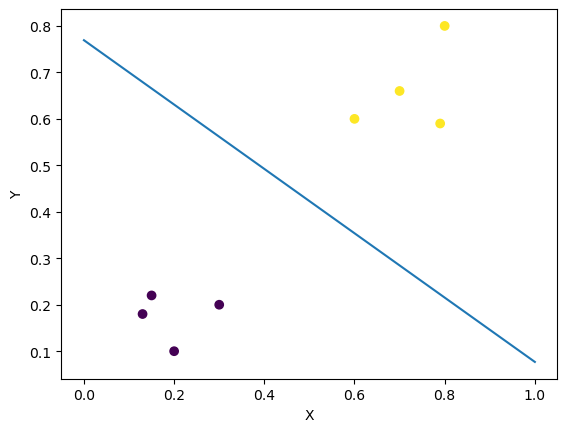

In [237]:
# Graph datasets and decision lines
ax1 = plt.axes()
first_col = debug_data[:, 0]
second_col = debug_data[:, 1]
b = classifier.get_weights()[2]
w2 = classifier.get_weights()[1]
w1 = classifier.get_weights()[0]
ax1.scatter(first_col, second_col, c=debug_data[:,2])
x = x = np.linspace(0,1,10)
y = (-w1/w2)*x + (-b/w2)
ax1.plot(x, y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

### 2.4 Discuss why the perceptron won’t converge on non-linearly separable data.

The perceptron algorithm for binary classification that tries to find a hyperplane that separates the data into two classes. It assumes that the data is linearly separable, meaning that a single straight line or hyperplane can separate the two classes with no overlap.However, if the data is not linearly separable, the perceptron algorithm may not converge to a solution. In this case, the algorithm will keep making updates to the weights and bias of the hyperplane, but it will never find a solution that satisfies the convergence criteria.This is because the perceptron algorithm relies on adjusting the weights and bias of the hyperplane based on the errors made by the current solution, but if the data is not linearly separable, no matter how much the weights and bias are adjusted, there will always be some data points that are misclassified.In conclusion, the perceptron algorithm is limited to only linearly separable data, and it may not converge on non-linearly separable data. 

## 3. (20%) Use your perceptron code to learn this version of the [voting data set](https://byu.instructure.com/files/4421311/download?download_frd=1).

This particular task is an edited version of the standard voting set, where we have replaced all the “don’t know” values with the most common value for the particular attribute.  

### 3.1 Create a table that reports the final training and test set accuracy and the number of epochs for each trial.

- Try it five times with different random 70/30 splits. 
- Use your own code to randomize and make splits. 
- Report the 5 trials and the average across the 5 trials in a table.  

| Trial | Training Accuracy | Test accuracy | Number of epochs |
| --- | --- | --- | --- |
| 1 | .95 | .55 | 4 |
| 2 | .85 | .45 | 6 |
| Average | .9 | .5 | 5 | 

*- As a rough sanity check, typical Perceptron test accuracies for the voting data set are 90%-98%.*


[ 2.77555756e-17 -2.00000000e-01 -8.00000000e-01  1.90000000e+00
  3.00000000e-01 -2.00000000e-01  3.00000000e-01  5.00000000e-01
 -9.00000000e-01  1.00000000e-01 -1.30000000e+00  2.00000000e-01
  1.00000000e-01 -2.77555756e-17 -2.00000000e-01  6.00000000e-01
 -1.20000000e+00]
0.96529284164859


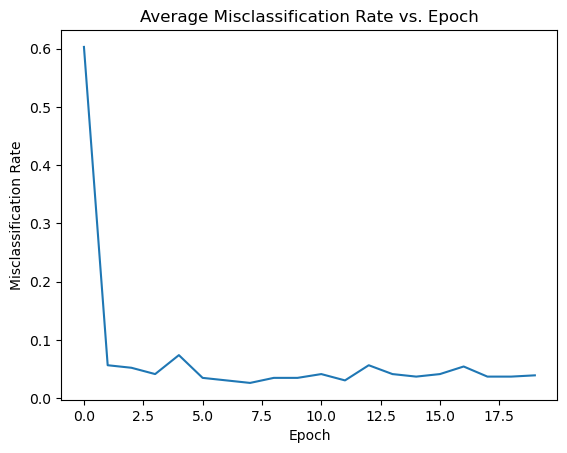

In [238]:
# Create the table any way you like

vote_data = arff.loadarff('voting-dataset.arff')
vote_data = pd.DataFrame(vote_data[0])
l3 = LabelEncoder()
vote = vote_data.apply(l3.fit_transform).values
mat = vote
data = mat[:,:-1]
labels = mat[:,-1] 
avg_accuracy = np.zeros(20)
for i in range(5):
    classifier = PerceptronClassifier(deterministic=20)
    classifier.fit(data, labels)
    avg_accuracy += classifier.get_scores()

total = avg_accuracy/5
print(classifier.get_weights())
print(classifier.score(data,labels))

plt.plot(np.arange(len(total)), total)
plt.title("Average Misclassification Rate vs. Epoch")
plt.xlabel("Epoch")
plt.ylabel("Misclassification Rate")
plt.show()

### 3.2 By looking at the weights, explain what the model has learned and how the individual input features affect the result. Which specific features are most critical for the voting task, and which are least critical? 


[ 2.77555756e-17 -2.00000000e-01 -8.00000000e-01  1.90000000e+00
  3.00000000e-01 -2.00000000e-01  3.00000000e-01  5.00000000e-01
 -9.00000000e-01  1.00000000e-01 -1.30000000e+00  2.00000000e-01
  1.00000000e-01 -2.77555756e-17 -2.00000000e-01  6.00000000e-01
 -1.20000000e+00]

The weights learned by the my model represent the importance of each input feature in predicting the target variable. A positive weight means that as the value of that feature increases, it is more likely that the congressperson is a Republican. Conversely, a negative weight means that as the value of that feature increases, it is more likely that the congressperson is a Democrat.Looking at the weights obtained, the model learned that features 4, 11, and 15 are the most critical for predicting the party affiliation, as they have the largest magnitude weights (1.9, -1.3, and 0.6, respectively). Feature 9 is also important, but to a lesser extent. On the other hand, the model learned that features 1, 2, 5, 14, and 16 are the least critical, as they have weights close to zero.

### 3.3 Make a graph of the average misclassification rate vs epochs (0th – final epoch).

- Average the misclassification rate for the training set across your 5 trials (not across 5 epochs).


![Average Misclassification Rate](https://raw.githubusercontent.com/rmorain/CS472-1/master/images/perceptron/avg_misclassification_rate_vs_epochs.png)

In [239]:
# Graph here
    
def plot_misclassification(avg_misclassification_rate):
    """
        Plots the average misclassification rate
    Args:
        avg_misclassification_rate (array-like): A 1D array or list
    """
    plt.plot(np.arange(len(avg_misclassification_rate)), avg_misclassification_rate)
    plt.title("Average Misclassification Rate vs. Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Misclassification Rate")
    plt.show()
    


## 4.1 (5%) Use the perceptron algorithm from the [scikit-learn toolkit](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html) to learn the voting task above.
- Report and compare your results with your own perceptron code.

In [240]:
# Load sklearn perceptron

# Train on voting dataset
from scipy.io import arff
from sklearn.linear_model import Perceptron
import pandas as pd

vote_data = arff.loadarff('voting-dataset.arff')
vote_data = pd.DataFrame(vote_data[0])
l3 = LabelEncoder()
vote = vote_data.apply(l3.fit_transform).values
mat = vote
data = mat[:,:-1]
labels = mat[:,-1] 
clf = Perceptron()
clf = clf.fit(data, labels)
clf.score(data,labels)



0.9609544468546638

The two results are the following:
Mine: 0.96529284164859
Sklearn:0.9609544468546638
Based on these results, the Sklearn provided performed slightly better than mine own implementation, with an accuracy difference of around 0.004. But overall the difference is not very significant. Plus, we could be using different hyper-parameters, that can also explain the variance

## 4.2 (5%) Use the perceptron algorithm from the [scikit-learn toolkit](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html) to learn one other data set of your choice.
- Try out some of the hyper-parameters that scikit-learn makes available.

While expreimenting with hyper-parametersi concluded the following: When changing tol value to a smaller number it resulted in more accurate solutions but longer training time. max_iter it increases performance with bigger values.

In [241]:
# Load sklearn perceptron

# Train on your dataset
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
X, y = load_digits(return_X_y=True)
clf = Perceptron(tol=1e-3, random_state=2020)
clf.fit(X, y)
Perceptron()
clf.score(X, y)

0.9660545353366722

## 5. (Optional 5% extra credit) Use the perceptron rule to learn the [iris task](https://byu.instructure.com/files/4421369/download?download_frd=1) or some other task with more than two possible output values. 

Note that the [iris data](https://byu.instructure.com/files/4421369/download?download_frd=1) set has 3 output classes, and a perceptron node only has two possible outputs.  You could implement either of the two most common ways to deal with this. For testing you just execute the novel instance on each model and combine the overall results to see which output class wins.